<a href="https://colab.research.google.com/github/marciafc/analise-estatistica-e-modelagem-preditiva-de-series-temporais-em-python-notebooks/blob/main/Aula09_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<strong><b><font size="5">Data Science Academy</font></b></strong>

<strong><b><font size="5">Análise Estatística e Modelagem Preditiva de Séries Temporais - Em Python</font></b></strong>

<strong><b><font size="5">Aula 9 - Exercícios</font></b></strong>

Todas as aulas deste curso podem ser encontradas na timeline da Comunidade em nosso portal: www.datascienceacademy.com.br

Neste Jupyter Notebook você encontra 2 exercícios. Com base no que você estudou nas aulas anteriores, tente resolvê-los e avaliar seu nível de compreensão sobre análise de séries temporais. Acompanhe abaixo suas atividades. 

**Exercício 1**:

Seu trabalho neste exercício é analisar a série temporal de produção mensal de sorvete entre 1972 e 2020 e então responder à pergunta abaixo:

1- Essa série temporal é estacionária ou não estacionária? Apresente o resultado da sua análise para justificar sua resposta.

O dataset fornecido a você é uma versão simplificada do dataset Icecream, resultado de um estudo realizado nos EUA:

https://rdrr.io/rforge/Ecdat/man/Index.Time.Series.html


**Exercício 2**:

Neste exercício você usará um dataset disponível no pacote yfinance (que deve ser instalado conforme mostrado abaixo). Já podemos antecipar que a série NÃO é estacionária e seu trabalho é aplicar as transformações necessárias para converter a série em estacionária.

Aproveite a oportunidade para estudar e revisar tudo que foi mostrado até aqui no curso, antes de avançarmos para temas mais complexos nas próximas aulas.

### Carregando e Preparando os Dados

Vamos carregar os dados e prepará-los para mais uma rodada de análise.

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook, se necessário.

In [2]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 2.1.3 which is incompatible.


In [3]:
!pip install -q -v importlib-metadata


In [4]:
!pip install -q -U watermark

In [5]:
# Instala o pacote yfinance
!pip install -q yfinance

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 8.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [6]:
!pip install -q requests>=2.26

In [7]:
!pip install -q folium==0.2.1

     |████████████████████████████████| 69 kB 3.0 MB/s 


In [8]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import yfinance as yf

# Imports para análise de dados
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [9]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

yfinance   : 0.1.69
sys        : 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
seaborn    : 0.11.2
IPython    : 5.5.0
pandas     : 1.1.5
numpy      : 1.19.5
matplotlib : 3.2.2
statsmodels: 0.10.2



## Exercício 1

Seu trabalho neste exercício é analisar a série temporal de produção mensal de sorvete entre 1972 e 2020 e então responder à pergunta abaixo:

1- Essa série temporal é estacionária ou não estacionária? Apresente o resultado da sua análise para justificar sua resposta.

O dataset fornecido a você é uma versão simplificada do dataset Icecream, resultado de um estudo realizado nos EUA:

https://rdrr.io/rforge/Ecdat/man/Index.Time.Series.html

In [10]:
# Carrega os dados
dados_serie = pd.read_csv('https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset2.csv')

In [11]:
# Série
dados_serie.head()

,DATE,NUMBER
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [12]:
# Ajusta o nome das colunas
dados_serie.rename(columns = {'DATE':'data', 'NUMBER':'producao'}, inplace = True)

In [13]:
# Série
dados_serie.head()

,data,producao
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [14]:
# Resumo estatístico da variável producao
dados_serie.describe()

,producao
count,577.000000
mean,109.701844
std,27.951723
min,58.659800
25%,88.514900
50%,107.461700
75%,127.932300
max,196.173700


In [15]:
# Maior produção de sorvete
# 2005-06-01,196.1737
dados_serie.max()

data        2020-01-01
producao       196.174
dtype: object

In [16]:
print('Início do Período de Tempo: {}\nFinal do Período de Tempo: {}'.format(dados_serie.data.min(), dados_serie.data.max()))

Início do Período de Tempo: 1972-01-01
Final do Período de Tempo: 2020-01-01


In [17]:
# Shape dos Dados
dados_serie.shape

(577, 2)

In [18]:
# Tipos dos Dados
dados_serie.dtypes

data         object
producao    float64
dtype: object

In [19]:
# Tipo do objeto
type(dados_serie)

pandas.core.frame.DataFrame

In [20]:
# Convertendo a coluna data de object para datetime. Exemplo 1972-05-01	  
dados_serie['data'] = pd.to_datetime(dados_serie['data'], format = '%Y-%m-%d')

In [21]:
dados_serie.dtypes

data        datetime64[ns]
producao           float64
dtype: object

In [22]:
dados_serie.head()

,data,producao
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [23]:
# Transformar a coluna de data no índice do conjunto de dados
dados_serie_index = dados_serie.set_index('data')

In [24]:
dados_serie_index.head()

,producao
data,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [25]:
# Visualizando o índice
dados_serie_index.index

DatetimeIndex(['1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
               '1972-05-01', '1972-06-01', '1972-07-01', '1972-08-01',
               '1972-09-01', '1972-10-01',
               ...
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', name='data', length=577, freq=None)

In [26]:
# Verificando se há algum valor nulo
dados_serie_index.isnull().sum()

producao    0
dtype: int64

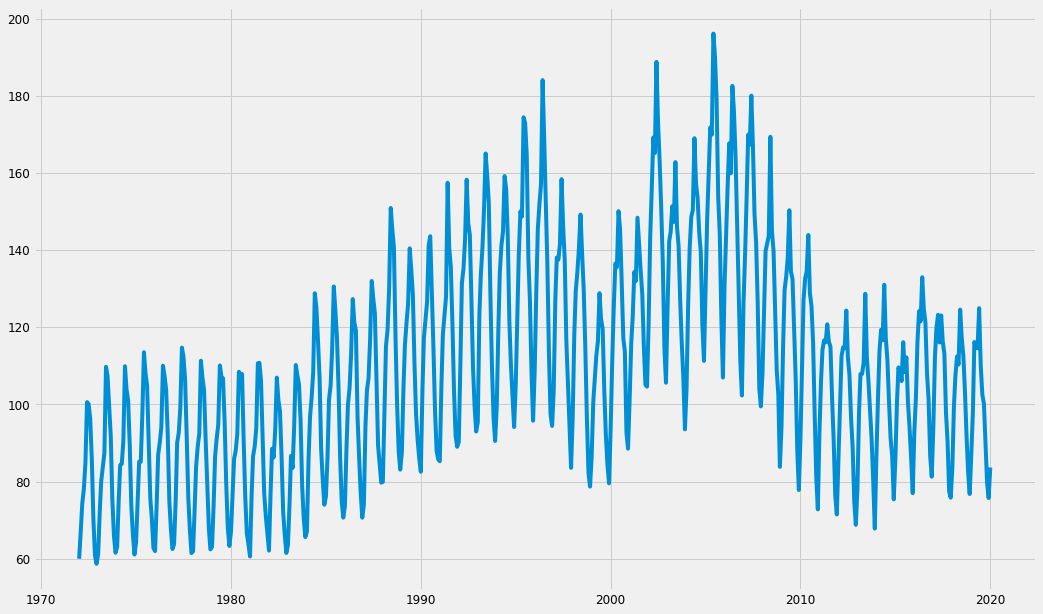

In [46]:
# Plot da série temporal
# dados_serie_index.plot(figsize = (15, 6))
# plt.show()

plt.plot(dados_serie_index)

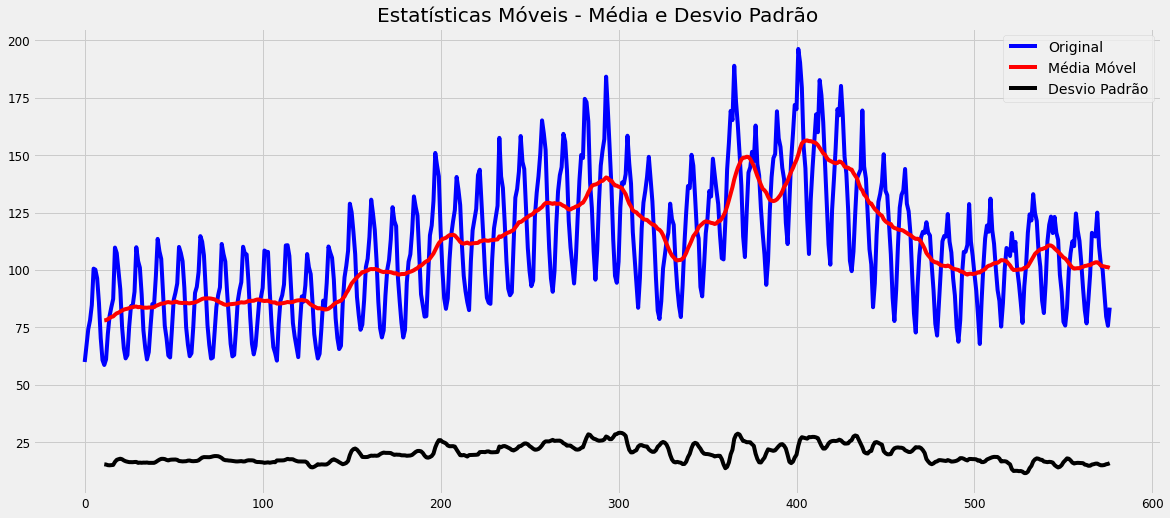

In [28]:
# Plot das Rolling Statistics (Estatísticas Móveis)

# Prepara os dados
x = dados_serie['data'].values
y = dados_serie['producao'].values

# Determinando estatísticas móveis
rolmean = dados_serie.rolling(window = 12).mean()
rolstd = dados_serie.rolling(window = 12).std()

# Plot das estatísticas móveis
orig = plt.plot(y, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
plt.legend(loc = 'best')
plt.title('Estatísticas Móveis - Média e Desvio Padrão')
plt.show()

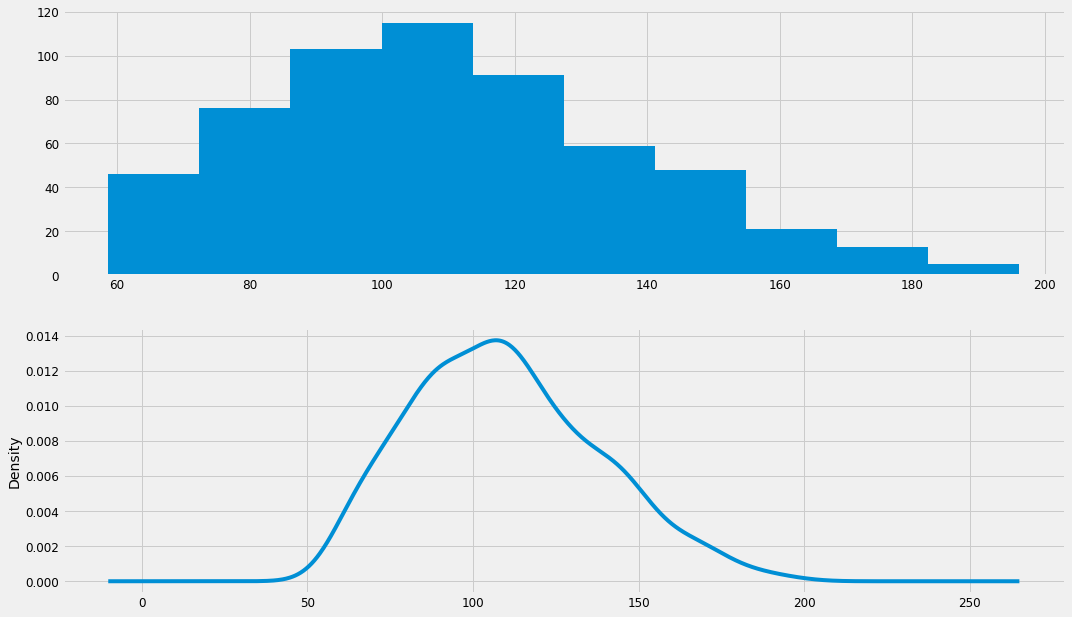

In [48]:
# Gráfico de Densidade

# Plot
plt.figure(1)

# Subplot 1
plt.subplot(211)
dados_serie_index.producao.hist()

# Subplot 2
plt.subplot(212)
dados_serie_index.producao.plot(kind = 'kde')
plt.show()

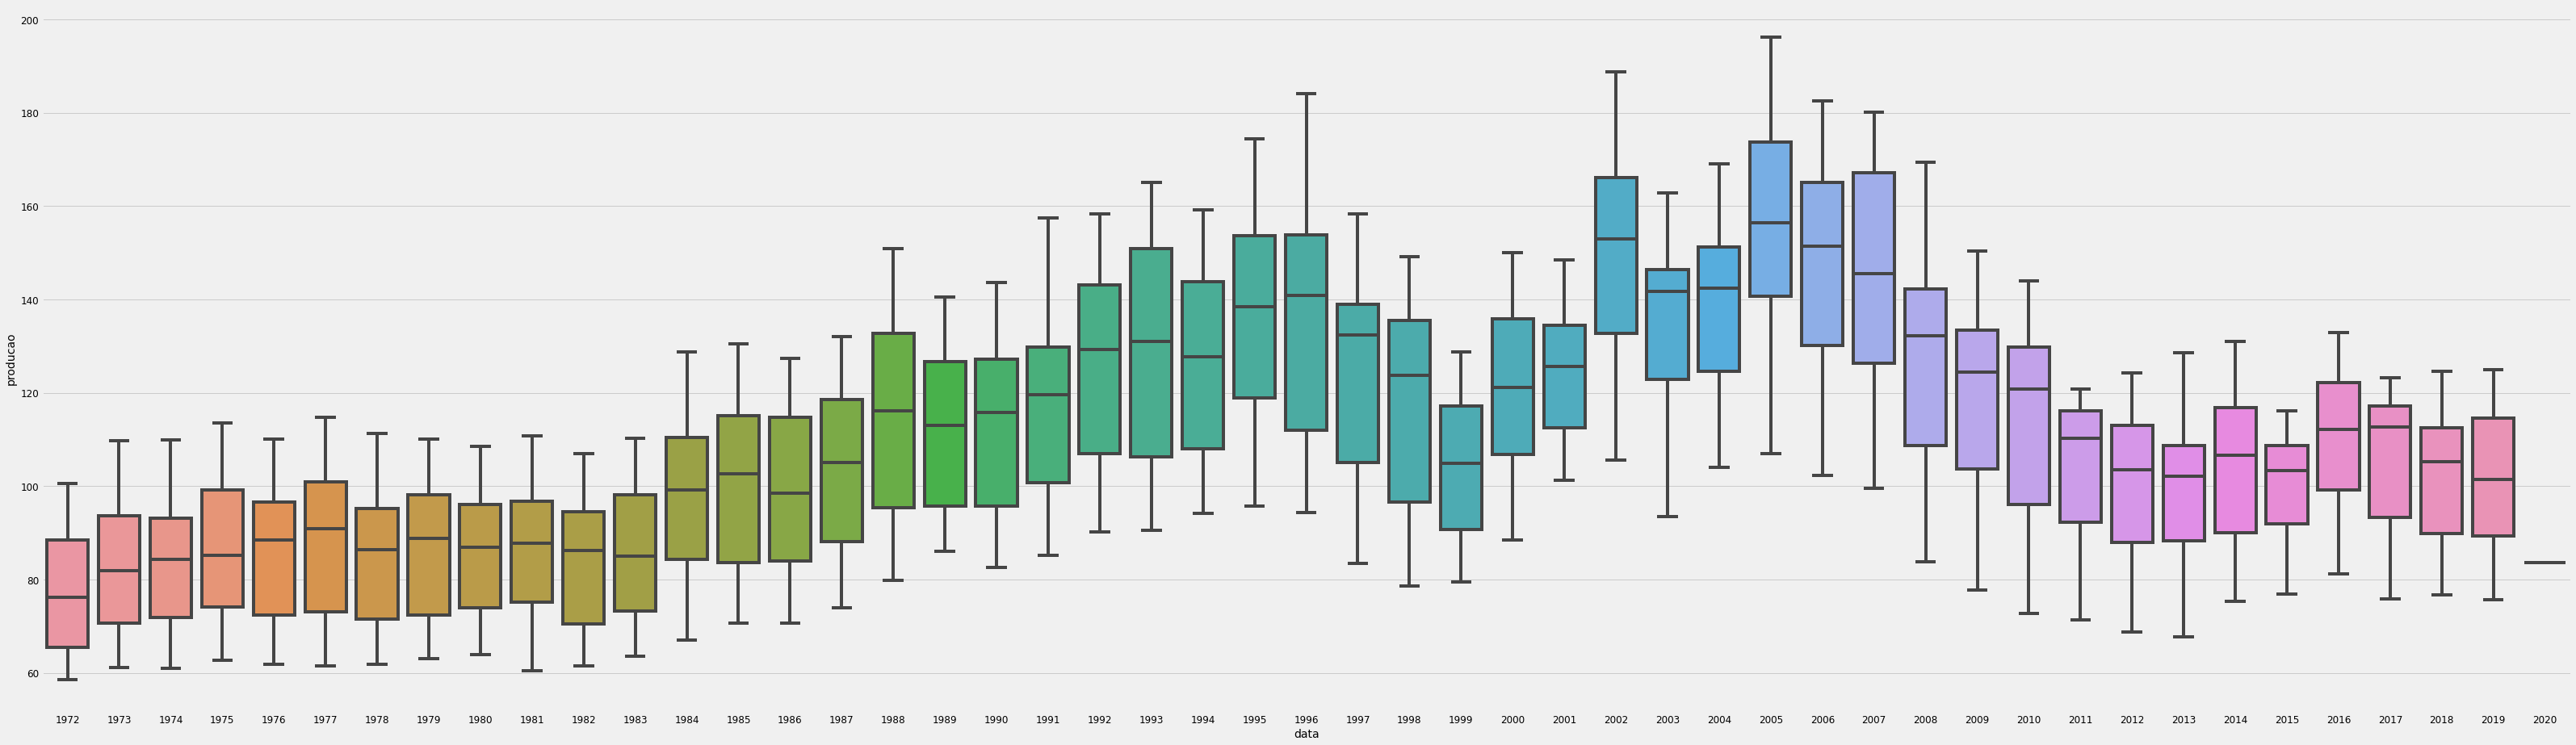

In [30]:
# Define a área de plotagem para os subplots (os boxplots)
fig, ax = plt.subplots(figsize=(50,15))

# Cria um box plot para cada ano usando o Seaborn
# Observe que estamos extraindo o ano (year) do índice da série
sns.boxplot(dados_serie_index.producao.index.year, dados_serie_index.producao, ax = ax)

In [31]:
def testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

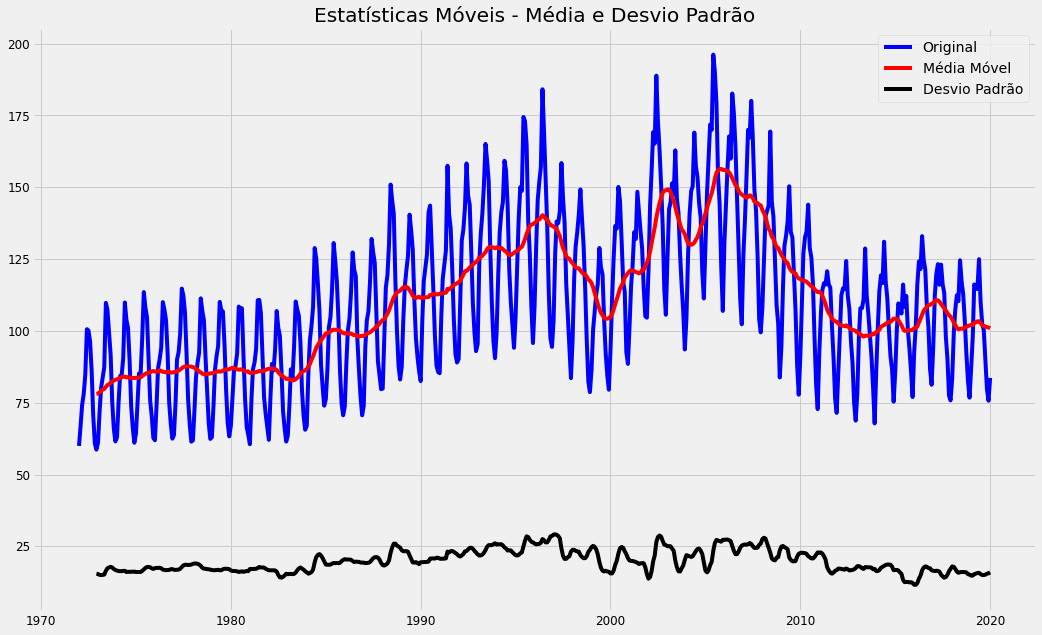


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -1.758009
Valor-p                           0.401499
Número de Lags Consideradas      19.000000
Número de Observações Usadas    557.000000
Valor Crítico (1%)               -3.442145
Valor Crítico (5%)               -2.866743
Valor Crítico (10%)              -2.569541
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [52]:
# Verificando a estacionaridade
testa_estacionaridade(dados_serie_index['producao'])

Resposta: Como a **média e variância não são constantes ao longo do tempo**, determinamos que a **série não é estacionária**. 

Ao realizarmos o teste de estacionariedade, o **valor-p** resultou em um valor **maior que 0,05**, confirmando a não estacionariedade.

A **autocorrelação** da série auxilia a confirmar.

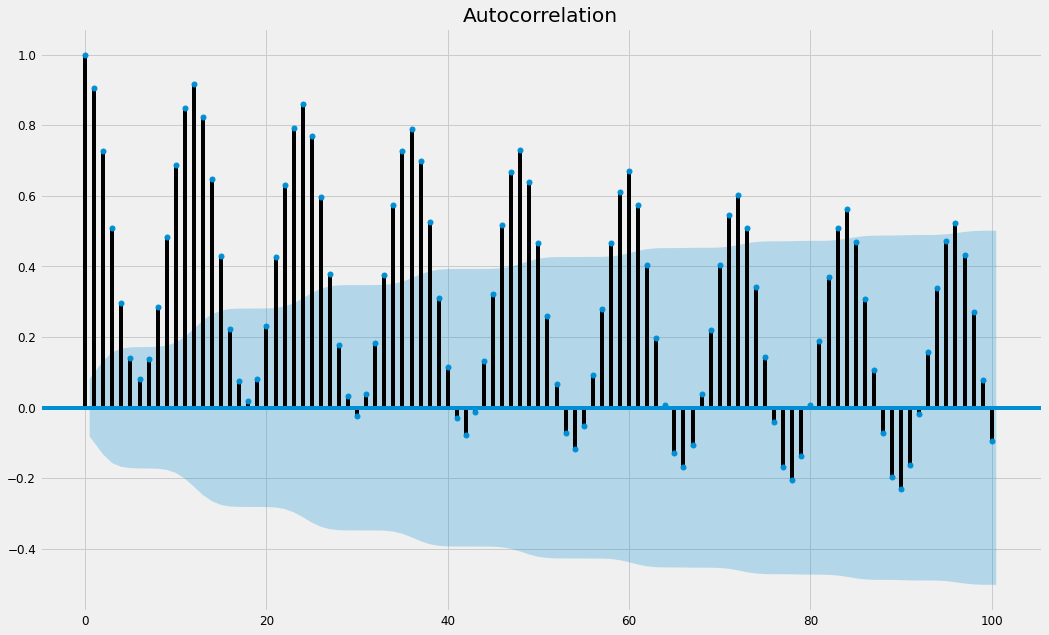

In [56]:
# Plots
# plt.rcParams.update({'figure.figsize': (16,10)})

# Plot ACF (Auto Correlation)

# A autocorrelação é a correlação de uma série temporal com uma cópia atrasada de si mesma.

# Testando a hipótese nula de que a correlação da série com a sua defasagem é igual a zero, podemos rejeitá-la 
# sempre que o nível de correlação estiver acima ou abaixo da área azul, com um nível de significância de 5%. 

# Com base na deterioração do ACF, provavelmente estamos lidando com um processo de regressão automática.

# plt.subplot(211)
# plot_acf(dados_serie_index.producao, ax = plt.gca(), lags = 30)
acf_plot = plot_acf(dados_serie_index.producao, lags = 100)


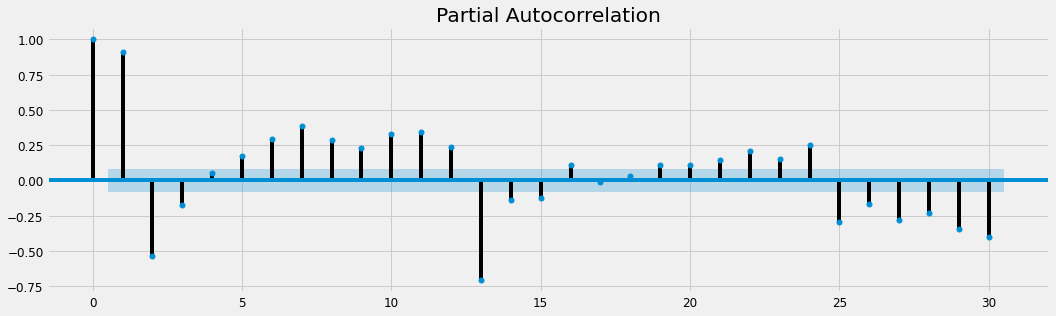

In [57]:
# Plot do gráfico PACF
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html
plt.subplot(212)
plot_pacf(dados_serie_index.producao, ax = plt.gca(), lags = 30)
plt.show()

## Exercício 2

Neste exercício você usará um dataset disponível no pacote yfinance. Já podemos antecipar que a série NÃO é estacionária e seu trabalho é aplicar as transformações necessárias para converter a série em estacionária.

Aproveite a oportunidade para estudar e revisar tudo que foi mostrado até aqui no curso, antes de avançarmos para temas mais complexos nas próximas aulas.

In [58]:
import yfinance as yf

In [59]:
# Define o código de uma das ações disponíveis cujos dados são disponibilizados pelo Yahoo Finance
tickerSymbol = 'SPY'

In [60]:
# Coleta os dados
tickerData = yf.Ticker(tickerSymbol)

In [61]:
# Obtém os valores históricos entre 2015 e 2020
tickerDf = tickerData.history(period = '1d', start = '2015-1-1', end = '2020-1-1')

In [62]:
# Gera o dataframe com os valores de fechamento das ações
tickerDf = tickerDf[['Close']]

In [63]:
# Visualiza os dados
tickerDf.head()

,Close
Date,
2015-01-02,180.342682
2015-01-05,177.085724
2015-01-06,175.417770
2015-01-07,177.603653
2015-01-08,180.755249


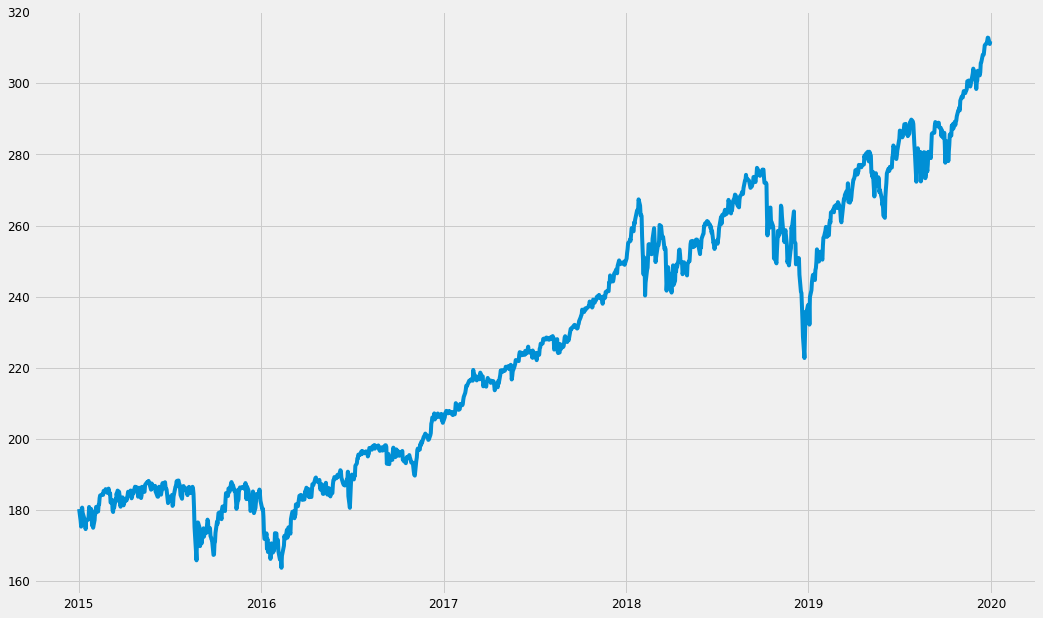

In [64]:
# Plot
plt.plot(tickerDf)

In [65]:
tickerDf.Close.values[1:3]

array([177.08572388, 175.41777039])

In [66]:
# Calculando a Diferenciação
diff_primeira_ordem = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
diff_primeira_ordem = np.concatenate([diff_primeira_ordem, [0]])

In [67]:
# Incluindo a diferença de primeira ordem no dataset
diff_primeira_ordem = pd.DataFrame(diff_primeira_ordem)
diff_primeira_ordem.columns = ['Diff']

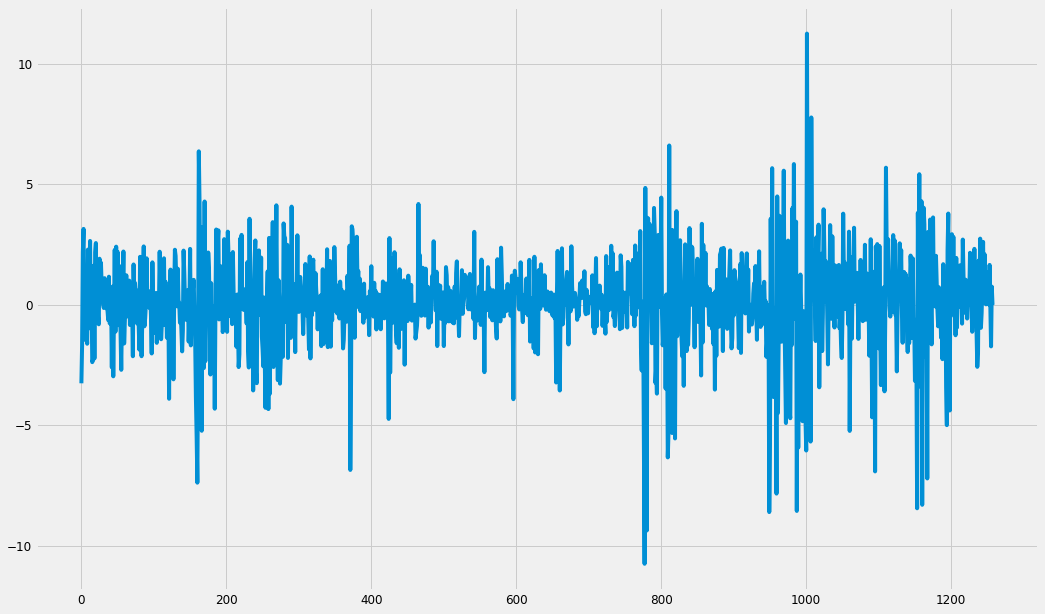

In [68]:
plt.plot(diff_primeira_ordem)

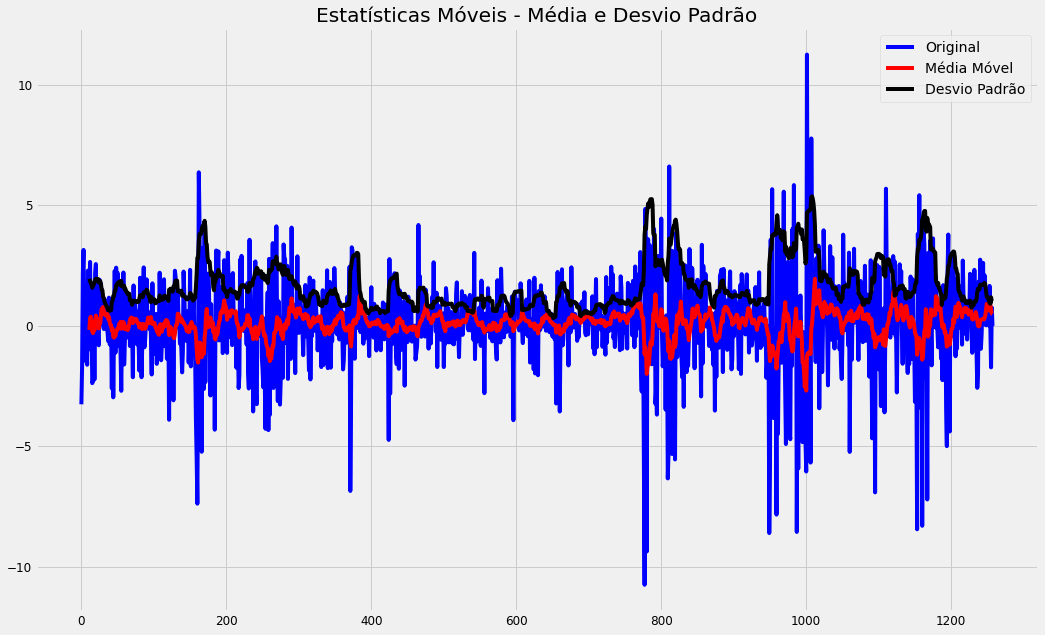


Resultado do Teste Dickey-Fuller:

Estatística do Teste           -1.339058e+01
Valor-p                         4.776432e-25
Número de Lags Consideradas     7.000000e+00
Número de Observações Usadas    1.250000e+03
Valor Crítico (1%)             -3.435592e+00
Valor Crítico (5%)             -2.863855e+00
Valor Crítico (10%)            -2.568003e+00
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [69]:
# Vamos testar a estacionaridade da série antes de qualquer transformação
testa_estacionaridade(diff_primeira_ordem['Diff'])

# Fim